In [1]:
%%bash 
which python

/global/homes/x/xju/.conda/envs/heptrk/bin/python


In [2]:
from heptrkx.nx_graph.utils_test import create_trained_model
from heptrkx.nx_graph.utils_plot import plot_metrics

W0916 15:28:08.884419 46912496622976 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

W0916 15:28:08.888715 46912496622976 deprecation_wrapper.py:119] From /global/homes/x/xju/.conda/envs/heptrk/lib/python3.6/site-packages/sonnet/python/custom_getters/restore_initializer.py:27: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W0916 15:28:08.936217 46912496622976 deprecation_wrapper.py:119] From /global/homes/x/xju/.local/lib/python3.6/site-packages/graph_nets/blocks.py:474: The name tf.unsorted_segment_sum is deprecated. Please use tf.math.unsorted_segment_sum instead.



In [3]:
config_file = '../configs/nxgraph_default.yaml'
input_ckpt = '/global/cscratch1/sd/xju/heptrkx/trackml/trained_results/nxgraph_big_007/bak'
model = create_trained_model(config_file, input_ckpt)

W0916 15:28:09.787142 46912496622976 deprecation_wrapper.py:119] From /global/project/projectdirs/atlas/xju/heptrack/gnn/code/heptrkx/heptrkx/nx_graph/utils_test.py:38: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0916 15:28:09.791303 46912496622976 deprecation_wrapper.py:119] From /global/homes/x/xju/.conda/envs/heptrk/lib/python3.6/site-packages/sonnet/python/modules/base.py:212: The name tf.make_template is deprecated. Please use tf.compat.v1.make_template instead.

W0916 15:28:09.794661 46912496622976 deprecation_wrapper.py:119] From /global/homes/x/xju/.conda/envs/heptrk/lib/python3.6/site-packages/sonnet/python/modules/base.py:294: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



Total Events: 226 with 16 sections, total 3616 files 
Training data: [0, 179] events, total 2880 files
Testing data:  [180, 226] events, total 736 files
Training and testing graphs are selected randomly from their corresponding pools


W0916 15:28:10.216709 46912496622976 deprecation.py:506] From /global/homes/x/xju/.conda/envs/heptrk/lib/python3.6/site-packages/sonnet/python/modules/basic.py:126: calling TruncatedNormal.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0916 15:28:10.217492 46912496622976 deprecation.py:506] From /global/homes/x/xju/.conda/envs/heptrk/lib/python3.6/site-packages/sonnet/python/modules/basic.py:131: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [4]:
iteration = 89908
odd, tdd = model(iteration)

W0916 15:28:10.844392 46912496622976 deprecation_wrapper.py:119] From /global/project/projectdirs/atlas/xju/heptrack/gnn/code/heptrkx/heptrkx/nx_graph/utils_test.py:54: The name tf.train.Saver is deprecated. Please use tf.compat.v1.train.Saver instead.

W0916 15:28:10.872473 46912496622976 deprecation.py:323] From /global/homes/x/xju/.conda/envs/heptrk/lib/python3.6/site-packages/tensorflow/python/training/saver.py:1276: checkpoint_exists (from tensorflow.python.training.checkpoint_management) is deprecated and will be removed in a future version.
Instructions for updating:
Use standard file APIs to check for files with this prefix.


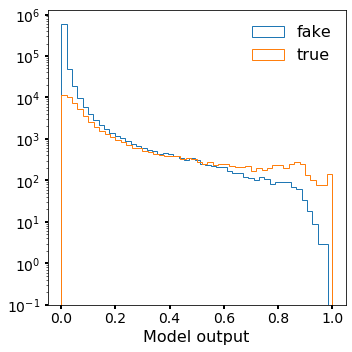

In [5]:
import sklearn.metrics
import matplotlib.pyplot as plt
y_pred, y_true = (odd > 0.5), (tdd > 0.5)
fpr, tpr, _ = sklearn.metrics.roc_curve(y_true, odd)


fig, (ax0) = plt.subplots(ncols=1, figsize=(5,5))

# Plot the model outputs
# binning=dict(bins=50, range=(0,1), histtype='step', log=True)
binning=dict(bins=50, histtype='step', log=True)
ax0.hist(odd[y_true==False], label='fake', **binning)
ax0.hist(odd[y_true], label='true', **binning)
ax0.set_xlabel('Model output')
ax0.legend(loc=0)

# # Plot the ROC curve
# auc = sklearn.metrics.auc(fpr, tpr)
# ax1.plot(fpr, tpr)
# ax1.plot([0, 1], [0, 1], '--')
# ax1.set_xlabel('False positive rate')
# ax1.set_ylabel('True positive rate')
# ax1.set_title('ROC curve, AUC = %.3f' % auc)

plt.tight_layout()
plt.savefig("tracking_GNN_scores.eps")

INFO:tensorflow:Restoring parameters from ../trained_results/nxgraph_small_decoder_001/bak/checkpoint_24869.ckpt
Accuracy:  0.9771
Precision: 0.9583
Recall:    0.9605


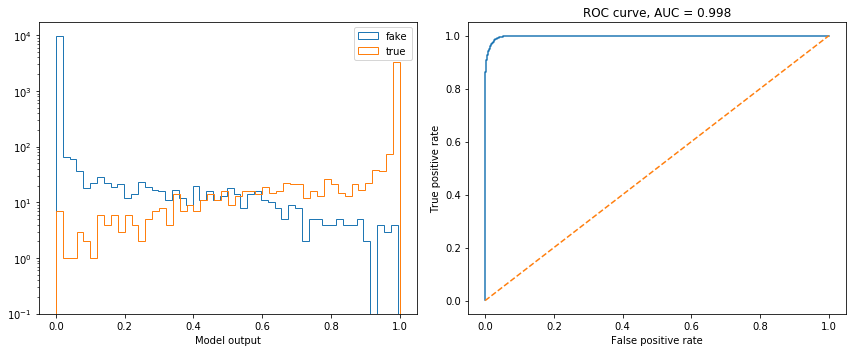

In [12]:
iteration = 24869
odd, tdd = model(iteration)
plot_metrics(odd, tdd, odd_th=0.5)